# **Project DSL**

In [1]:
import pandas as pd
from google.colab import drive
from scipy.stats import pointbiserialr
import sys
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import warnings

random.seed(42)
drive.mount('/content/drive')

Mounted at /content/drive


Let us display the first examples of our datasets

In [3]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")
df_ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/evaluation.csv")
print('Size of the DataFrame', df_dev.shape)
df_dev.head()

Size of the DataFrame (7284, 44)


,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,...,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,...,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,...,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,...,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,...,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4


In [4]:
print('Size of the DataFrame', df_ev.shape)
df_ev.head()

Size of the DataFrame (1821, 43)


,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,Id
0,75.70197,male,COPD,COPD/CHF/Cirrhosis,3,15.0,$11-$25k,0.0,8417.0,5477.2930,...,1.299805,136.0,7.349609,175.0,42.0,1100.0,3.0,2.0,2.00000,0
1,44.61600,male,CHF,COPD/CHF/Cirrhosis,2,16.0,under $11k,0.0,71501.0,34153.9062,...,1.099854,126.0,NaN,106.0,19.0,2625.0,4.0,5.0,5.00000,1
2,66.43396,male,ARF/MOSF w/Sepsis,ARF/MOSF,4,NaN,under $11k,0.0,18040.0,11452.9219,...,1.399902,139.0,7.389648,NaN,NaN,NaN,NaN,NaN,3.20752,2
3,50.97897,male,CHF,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,0.0,20779.0,12855.9375,...,0.599976,133.0,7.449219,160.0,17.0,2065.0,0.0,2.0,2.00000,3
4,49.54999,female,Lung Cancer,Cancer,1,12.0,under $11k,0.0,11291.0,8300.6562,...,0.899902,139.0,NaN,88.0,12.0,NaN,0.0,0.0,0.00000,4


**The next step is to find missing values**

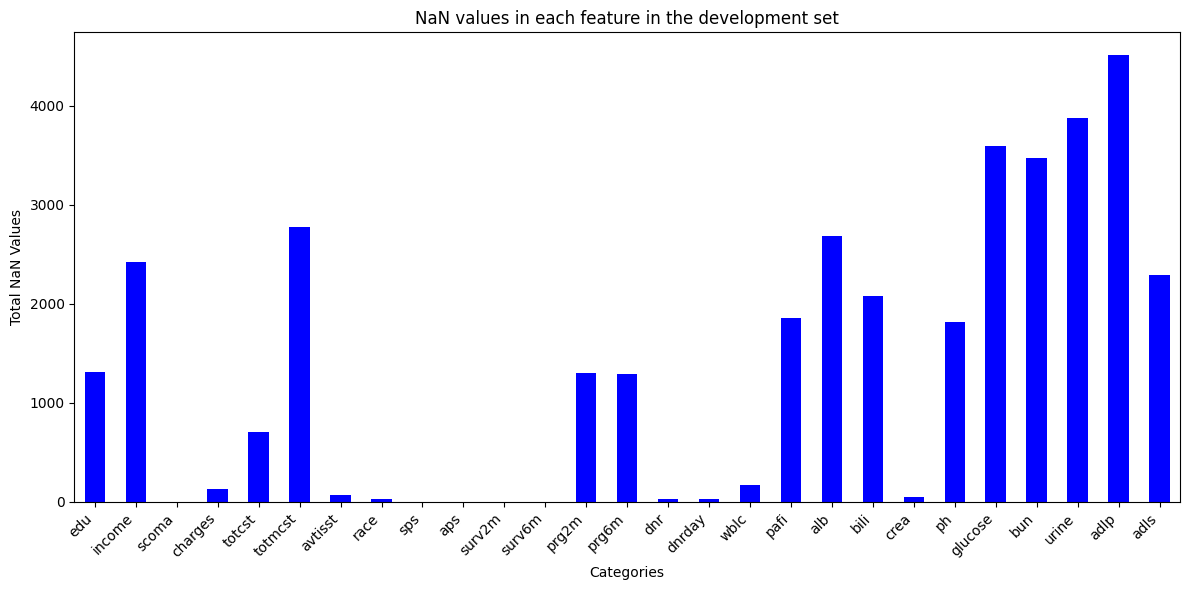

In [5]:
counts = df_dev.drop(['Id', 'death'], axis=1).isna().sum()

plt.figure(figsize=(12, 6))
counts[counts > 0].plot(kind='bar', color='blue')
plt.title('NaN values in each feature in the development set')
plt.xlabel('Categories')
plt.ylabel('Total NaN Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

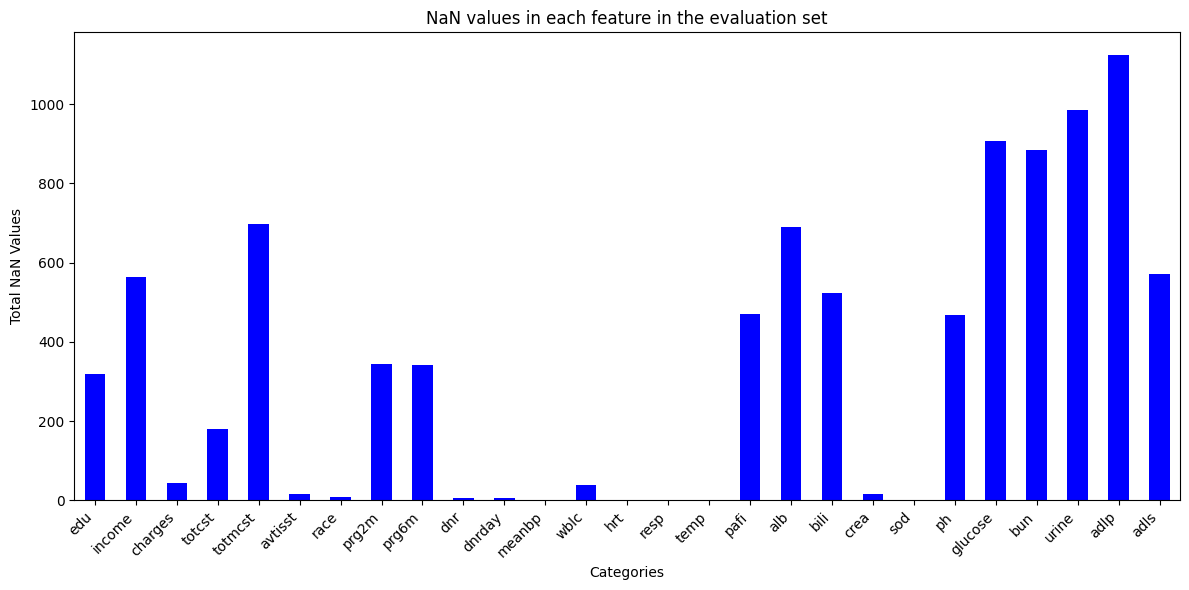

In [6]:
counts = df_ev.drop(['Id'], axis=1).isna().sum()

plt.figure(figsize=(12, 6))
counts[counts > 0].plot(kind='bar', color='blue')
plt.title('NaN values in each feature in the evaluation set')
plt.xlabel('Categories')
plt.ylabel('Total NaN Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Finding qualitative attributes in the dataset**

In [ ]:
quantitative = df_dev.drop(columns = ['Id', 'death']).select_dtypes(include = ['number']).columns
qualitative = df_dev.drop(columns = quantitative)
print(qualitative.drop(columns = ['Id', 'death']).columns)

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')


**Correlations and plots**



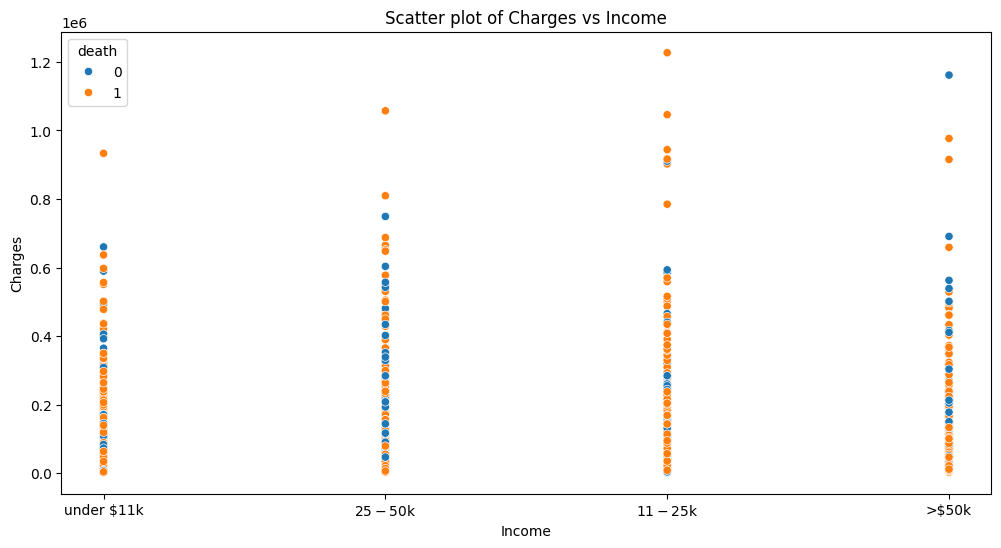

In [7]:
#Correlation between income, charges and death

plt.figure(figsize=(12, 6))
sns.scatterplot(x='income', y='charges', hue='death', data=df_dev)
plt.title('Scatter plot of Charges vs Income')
plt.xlabel('Income')
plt.ylabel('Charges')
plt.show()

In [ ]:
#Correlation between education and death

df = df_dev.copy()
df.dropna(inplace=True)
correlation, p_value = pointbiserialr(df['edu'], df['death'])

print("Point-biserial correlation:", correlation)
print("P-value:", p_value)

Point-biserial correlation: 0.012348738713025484
P-value: 0.8453436361662184


In [10]:
features_to_drop = ['Id', 'death']
X = df_dev.drop(features_to_drop, axis=1)
y = df_dev['death']

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']
X = pd.get_dummies(df_dev, columns=encodeColumns).drop(columns = ['income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass'])

with warnings.catch_warnings():
    # Initialize KNN imputer
    imputer = SimpleImputer(strategy = 'mean')

    # Fit and transform the data
    X_imputed = imputer.fit_transform(X)

    # Convert back to a pandas DataFrame (if necessary)
    X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
    warnings.simplefilter("ignore")
    model = sm.Logit(y, X_imputed)
    result = model.fit()
    print("Death p-value: ", result.pvalues['edu'])


         Current function value: 0.000000
         Iterations: 35
Death p-value:  0.9951653859865552


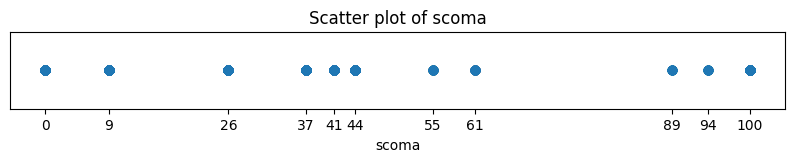

In [ ]:
#Analysis of the values in the scoma column
counts = df_dev['scoma'].value_counts()


y_values = [0] * len(df_dev)
plt.figure(figsize=(10, 1))
plt.scatter(df_dev['scoma'], y_values, alpha=0.5)
plt.xticks(sorted(set(counts.keys())))
plt.title('Scatter plot of scoma')
plt.xlabel('scoma')
plt.ylabel('')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

**REMOVING FEATURES**

In [12]:
encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']

df_dev = pd.get_dummies(df_dev, columns=encodeColumns)
removeColumns = ['edu', 'income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass']

print('Number of removed columns: ', len(removeColumns))

df_dev = df_dev.drop(columns = removeColumns)
df_ev = df_ev.drop(columns = removeColumns)

print('Number of columns in the set after removal: ', df_dev.shape)


Number of removed columns:  7
Number of columns in the set after removal:  (7284, 53)


##**RANDOM FOREST CLASSIFIER**

In [ ]:
X = df_dev.drop(columns = ["death", "Id"])
y = df_dev["death"]

##**TRYING PCA**

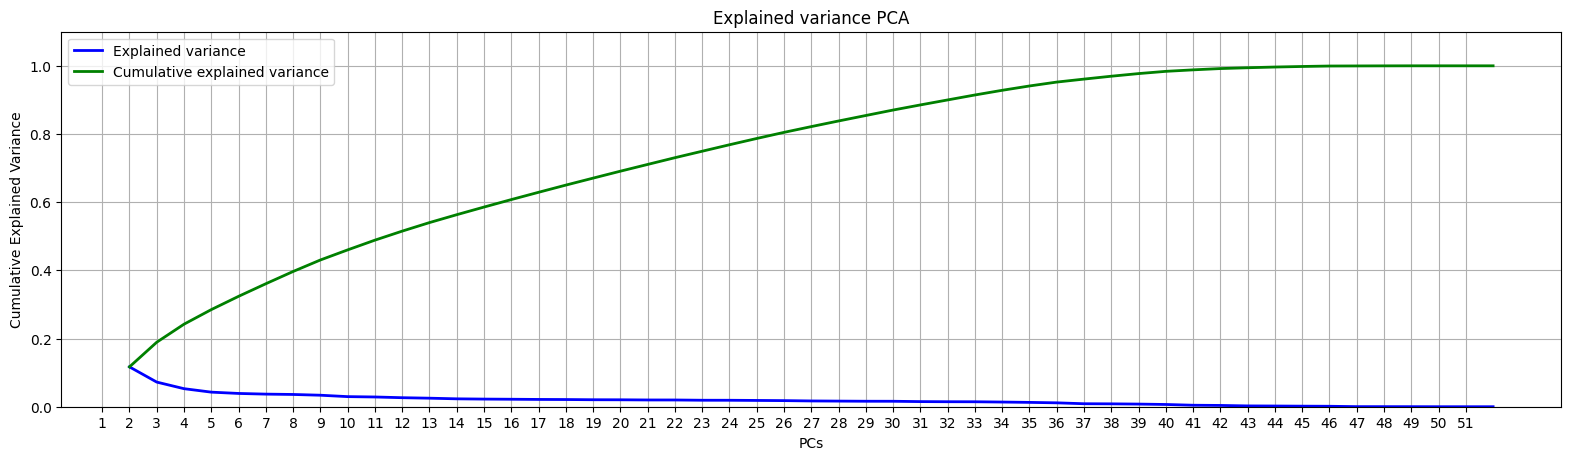

<Figure size 640x480 with 0 Axes>

In [14]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")
df_dev = df_dev.drop(columns = removeColumns)
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)

X = df_dev.drop(columns = ["death", "Id"])
y = df_dev["death"]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 1, 1)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'b-', label='Explained variance', linewidth=2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'g-', label='Cumulative explained variance', linewidth=2)
plt.ylim([0, 1.1])
plt.xticks(ticks = np.arange(pca.n_components_), labels = [f'{i+1}' for i in range(pca.n_components_)], )
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance PCA')
plt.xlabel("PCs")
plt.ylabel("Cumulative Explained Variance")
plt.legend(loc='best')
plt.grid(True)
plt.grid('on')
plt.show()

plt.tight_layout()
plt.show()

**Computing final result**

In [20]:
df_ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/evaluation.csv")

df_ev = df_ev.drop(columns = removeColumns)
df_ev = pd.get_dummies(df_ev, columns=encodeColumns)

X_final_test = df_ev.drop(columns = ["Id"])

imputer = SimpleImputer(strategy='mean')
X_final_test = imputer.fit_transform(X_final_test)

scaler = StandardScaler()
X_final_test = scaler.fit_transform(X_final_test)

pca = PCA(30)
pca.fit(X_final_test)
X_final_test_PCA = pca.fit_transform(X_final_test)
X = pca.fit_transform(X)

model_PCA = RandomForestClassifier()
model_PCA.fit(X, y)

y_test = model_PCA.predict(X_final_test_PCA)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X, y)
y_test_KNN = model_KNN.predict(X_final_test_PCA)

In [ ]:
predicted = pd.DataFrame({'Id': df_ev["Id"].values, 'Predicted': y_test})
predicted.to_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/output_PCA_RF.csv", index = False, header = ["Id", "Predicted"])

predicted = pd.DataFrame({'Id': df_ev["Id"].values, 'Predicted': y_test_KNN})
predicted.to_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/output_PCA_KNN.csv", index = False, header = ["Id", "Predicted"])

##**TRYING DEALING WITH NAN**

In [22]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)
removeColumns = ['edu', 'income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass']

df_dev = df_dev.drop(columns = removeColumns)
X = df_dev.drop(columns = ["death", "Id"])
y = df_dev["death"]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
params = {
    'n_estimators': [200, 225, 250],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
}

clf = RandomForestClassifier()
gs = GridSearchCV(clf, params, scoring = 'f1_macro', n_jobs = -1, cv = 10)
gs.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 225, 250], 'n_jobs': [-1],
                         'random_state': [42]},
             scoring='f1_macro')

In [ ]:
gs.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 250,
 'n_jobs': -1,
 'random_state': 42}

In [35]:
best_model = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators=250, bootstrap=True, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')
print("Cross-validation F1 score: ", np.max(cv_scores))

best_model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=248, bootstrap=True, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')
print("Cross-validation F1 score: ", np.max(cv_scores))

Cross-validation F1 score: 0.7544616491953344
Cross-validation F1 score: 0.7562696359165719


In [ ]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)
removeColumns = ['edu', 'income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass']

df_dev = df_dev.drop(columns = removeColumns)

df_ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/evaluation.csv")

X = df_dev.drop(columns = ["death", "Id"])
y = df_dev["death"]

imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(X)

best_model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=248, bootstrap=True, n_jobs=-1, random_state=42)

best_model.fit(X, y)

#Testing
df_ev = df_ev.drop(columns = removeColumns)
df_ev = pd.get_dummies(df_ev, columns=encodeColumns)


X_final_test = df_ev.drop(columns = ["Id"])

imputer = SimpleImputer(strategy = 'mean')
X_final_test = imputer.fit_transform(X_final_test)

y_test = best_model.predict(X_final_test)

In [ ]:
predicted = pd.DataFrame({'Id': df_ev["Id"].values, 'Predicted': y_test})
predicted.to_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/output RF GridSearch Imp.csv", index = False, header = ["Id", "Predicted"])

##**KNN**

In [ ]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)
removeColumns = ['edu', 'income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass']

df_dev = df_dev.drop(columns = removeColumns)

X = df_dev.drop(columns = ["death", "Id"])
y = df_dev["death"]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

(5827, 51) (5827,) (1457, 51) (1457,)


In [ ]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm' : ['auto']
}

clf = KNeighborsClassifier()
gs = GridSearchCV(clf, params, scoring = 'f1_macro', n_jobs = -1, cv = 5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [36]:
best_model = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan', n_neighbors = 3, weights = 'uniform')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')
print("Cross-validation F1 score: ", np.max(cv_scores))

Cross-validation F1 score: 0.529666044096745


In [ ]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race']
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)
removeColumns = ['edu', 'income', 'scoma', 'hday', 'dnrday', 'pafi', 'dzclass']

df_dev = df_dev.drop(columns = removeColumns)

df_ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/evaluation.csv")

X = df_dev.drop(columns = ["Id", "death"])
y = df_dev["death"]

imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(X)

best_model = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan', n_neighbors = 3, weights = 'uniform')
best_model.fit(X, y)

#Testing
df_ev = df_ev.drop(columns = removeColumns)
df_ev = pd.get_dummies(df_ev, columns=encodeColumns)

X_final_test = df_ev.drop(columns = ["Id"])

imputer = SimpleImputer(strategy = 'mean')
X_final_test = imputer.fit_transform(X_final_test)

y_test = best_model.predict(X_final_test)

In [ ]:
predicted = pd.DataFrame({'Id': df_ev["Id"].values, 'Predicted': y_test})
predicted.to_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/output_KNN GRID.csv", index = False, header = ["Id", "Predicted"])

##**NAIVE APPROACH**
All features, no hyperparameter tunning

In [6]:
df_dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/development.csv")
df_ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSL Project/evaluation.csv")

encodeColumns = ['dzgroup', 'ca', 'dnr', 'sex', 'race', 'dzclass', 'income']
df_dev = pd.get_dummies(df_dev, columns=encodeColumns)

X = df_dev.drop(columns = ["Id", "death"])
y = df_dev["death"]

imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(X)

clf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
print(f"Cross-validation F1 score (min, max): {np.min(cv_scores), np.max(cv_scores)}")

knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X, y, cv=cv, scoring='f1_macro')
print(f"Cross-validation F1 score (min, max): {np.min(cv_scores), np.max(cv_scores)}")

Cross-validation F1 score (min, max): (0.6928451529318989, 0.7546047890257706)
Cross-validation F1 score (min, max): (0.47058288807862075, 0.5135031736370751)
